In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn import cross_validation

import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold




In [2]:
train=pd.read_csv('../input/1st-comp/train.csv')
test=pd.read_csv('../input/1st-comp/test.csv')
sample=pd.read_csv('../input/1st-comp/sample_submission_lfbv3c3 (1).csv')

In [3]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
sample.head(2)

,case_id,Stay
0,318439,0-10
1,318440,0-10


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
#train.Stay.value_counts(sort=True)
obj_types=train.select_dtypes('object').columns
print (obj_types)
print('Numner of cat_features :'+str(len(obj_types)))
print("lenght of dataset:"+str(len(train)))
print('columns' + str(len(train.columns)))

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')
Numner of cat_features :9
lenght of dataset:318438
columns18


In [7]:
for col in train.columns[train.dtypes=='object']:
  print("The number of unique values for {} is {}".format(col,train[col].nunique()))

The number of unique values for Hospital_type_code is 7
The number of unique values for Hospital_region_code is 3
The number of unique values for Department is 5
The number of unique values for Ward_Type is 6
The number of unique values for Ward_Facility_Code is 6
The number of unique values for Type of Admission is 3
The number of unique values for Severity of Illness is 3
The number of unique values for Age is 10
The number of unique values for Stay is 11


In [8]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
train.Stay.value_counts(sort=True)

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [10]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [11]:
# gridsearchCV
'''penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)'''

"penalty = ['l1', 'l2']\nC = [0.0001, 0.001, 0.01]\nclass_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}]\nsolver = ['liblinear', 'saga']\n\nparam_grid = dict(penalty=penalty,\n                  C=C,\n                  class_weight=class_weight,\n                  solver=solver)\n\ngrid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)\ngrid_result = grid.fit(X_train, y_train)\n\nprint('Best Score: ', grid_result.best_score_)\nprint('Best Params: ', grid_result.best_params_)"

In [12]:
# imputer example
'''Dataset = pd.read_csv('Data.csv')

X = Dataset.iloc[:, :-1].values

# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])'''

"Dataset = pd.read_csv('Data.csv')\n\nX = Dataset.iloc[:, :-1].values\n\n# To calculate mean use imputer class\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(missing_values=np.nan, strategy='mean')\nimputer = imputer.fit(X[:, 1:3])\nX[:, 1:3] = imputer.transform(X[:, 1:3])"

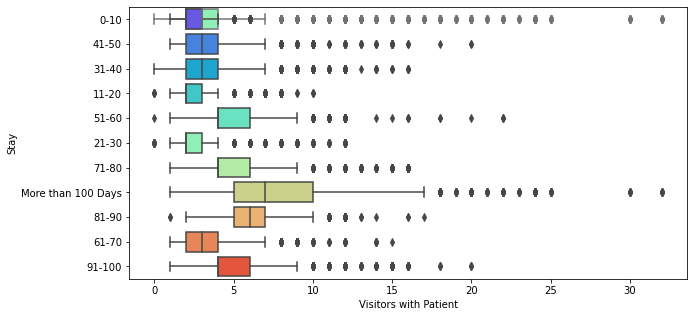

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Visitors with Patient", data=train,palette='rainbow')
sns.boxplot(x="Visitors with Patient",y='Stay',data=train,palette='rainbow')

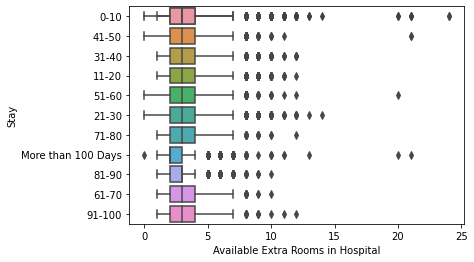

In [14]:
sns.boxplot(x='Available Extra Rooms in Hospital',data=train)
sns.boxplot(x='Available Extra Rooms in Hospital',y='Stay',data=train)

# Performing operations for outliers

In [15]:
print(np.percentile(train['Visitors with Patient'],[99])[0])
np.percentile(train['Visitors with Patient'],[75])[0] #just to see the value at 75%


10.0


4.0

In [16]:
uv=np.percentile(train['Visitors with Patient'],[99])[0]


In [17]:
train[(train['Visitors with Patient']>uv)].max()

case_id                                          317967
Hospital_code                                        32
Hospital_type_code                                    g
City_Code_Hospital                                   13
Hospital_region_code                                  Z
Available Extra Rooms in Hospital                    21
Department                                      surgery
Ward_Type                                             T
Ward_Facility_Code                                    F
Bed Grade                                             4
patientid                                        131513
City_Code_Patient                                    33
Type of Admission                                Urgent
Severity of Illness                            Moderate
Visitors with Patient                                32
Age                                              91-100
Admission_Deposit                                 10035
Stay                                 More than 1

In [18]:
train['Visitors with Patient']=train['Visitors with Patient'].apply(lambda x:1*uv if x>1*uv else x)


In [19]:
print(np.percentile(train['Available Extra Rooms in Hospital'],[99])[0])
np.percentile(train['Available Extra Rooms in Hospital'],[75])[0] #just to see the value at 75%



7.0


4.0

In [20]:
uv=np.percentile(train['Available Extra Rooms in Hospital'],[99])[0]

In [21]:
train[(train['Available Extra Rooms in Hospital']>uv)].max()

case_id                                          318221
Hospital_code                                        32
Hospital_type_code                                    f
City_Code_Hospital                                   13
Hospital_region_code                                  Z
Available Extra Rooms in Hospital                    24
Department                                      surgery
Ward_Type                                             S
Ward_Facility_Code                                    F
Bed Grade                                             4
patientid                                        131604
City_Code_Patient                                    32
Type of Admission                                Urgent
Severity of Illness                            Moderate
Visitors with Patient                                10
Age                                              91-100
Admission_Deposit                                  9290
Stay                                 More than 1

In [22]:
train['Available Extra Rooms in Hospital']=train['Available Extra Rooms in Hospital'].apply(lambda x:2*uv if x>2*uv else x)


In [23]:
print(np.percentile(train['Visitors with Patient'],[99])[0])
np.percentile(train['Visitors with Patient'],[75])[0] #just to see the value at 75%


10.0


4.0

# performing operation on null

In [24]:

#tt= tt.apply(lambda x: x.fillna(x.mean()),axis=0)
train['Bed Grade']=train['Bed Grade'].fillna(train['Bed Grade'].median())
train['City_Code_Patient']=train['City_Code_Patient'].fillna(train['City_Code_Patient'].median())

In [25]:
train.drop(['patientid'],axis=1,inplace=True)

In [26]:
train.set_index(['case_id'],inplace=True)

# perform Label Encoding

In [27]:
# Assign the columns.

#y = train.Stay
#X = train.drop("Stay",1)
Y_train=train.loc[:,['Stay']]

#feature_importance_df['Feature'] = X_train.columns
train.drop(['Stay'],axis=1,inplace=True)

In [28]:
le = LabelEncoder()
for col in train.columns[train.dtypes == "object"]:
    train[col] = le.fit_transform(train[col])

# Repeating Precedure for Text Data

In [29]:
test.describe('')

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,4.758692,3.192686,2.634489,65877.903515,7.243996,3.284531,4869.731097
std,39565.092259,8.634694,3.102245,1.164250,0.869295,37942.997623,4.790625,1.777270,1080.766723
min,318439.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1800.000000
50%,386967.000000,19.000000,5.000000,3.000000,3.000000,65786.000000,8.000000,3.000000,4731.000000
max,455495.000000,32.000000,13.000000,21.000000,4.000000,131618.000000,38.000000,32.000000,11920.000000


In [30]:
test.drop(['patientid'],axis=1,inplace=True)
test_case_id=test['case_id']
test.set_index(['case_id'],inplace=True)

In [31]:
print(np.percentile(test['Visitors with Patient'],[99])[0])
np.percentile(test['Visitors with Patient'],[75])[0] #just to see the value at 75%


10.0


4.0

In [32]:
uv=np.percentile(test['Visitors with Patient'],[99])[0]

In [33]:
test[test['Visitors with Patient']>uv].max()


Hospital_code                              32
Hospital_type_code                          g
City_Code_Hospital                         13
Hospital_region_code                        Z
Available Extra Rooms in Hospital          21
Department                            surgery
Ward_Type                                   T
Ward_Facility_Code                          F
Bed Grade                                   4
City_Code_Patient                          33
Type of Admission                      Urgent
Severity of Illness                  Moderate
Visitors with Patient                      32
Age                                    91-100
Admission_Deposit                       10304
dtype: object

In [34]:
test['Visitors with Patient']=test['Visitors with Patient'].apply(lambda x:1*uv if x>1*uv else x)


In [35]:
print(np.percentile(test['Available Extra Rooms in Hospital'],[99])[0])
np.percentile(test['Available Extra Rooms in Hospital'],[75])[0] #just to see the value at 75%



7.0


4.0

In [36]:
uv=np.percentile(test['Available Extra Rooms in Hospital'],[99])[0]
test[(test['Available Extra Rooms in Hospital']>uv)].max()

Hospital_code                              32
Hospital_type_code                          f
City_Code_Hospital                         13
Hospital_region_code                        Z
Available Extra Rooms in Hospital          21
Department                            surgery
Ward_Type                                   S
Ward_Facility_Code                          F
Bed Grade                                   4
City_Code_Patient                          33
Type of Admission                      Urgent
Severity of Illness                  Moderate
Visitors with Patient                      10
Age                                    91-100
Admission_Deposit                        9403
dtype: object

In [37]:
test['Available Extra Rooms in Hospital']=test['Available Extra Rooms in Hospital'].apply(lambda x:2*uv if x>2*uv else x)

In [38]:
le = LabelEncoder()
for col in test.columns[test.dtypes == "object"]:
    test[col] = le.fit_transform(test[col])

In [39]:
test.isnull().sum()
test['City_Code_Patient']=test['City_Code_Patient'].fillna(test['City_Code_Patient'].median())
test['Bed Grade']=test['Bed Grade'].fillna(test['Bed Grade'].median())

In [40]:
"""grid_values = {'learning_rate': [0.01, 0.1, 1]}
    clf = GradientBoostingClassifier(random_state = 0)
    grid = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
    grid.fit(X_train, y_train)
    result = grid.predict_proba(data_test)[:, 1]
    result_new = pd.Series(result, index = data_test.index)
 """

"grid_values = {'learning_rate': [0.01, 0.1, 1]}\n    clf = GradientBoostingClassifier(random_state = 0)\n    grid = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')\n    grid.fit(X_train, y_train)\n    result = grid.predict_proba(data_test)[:, 1]\n    result_new = pd.Series(result, index = data_test.index)\n "

# Modeling

In [41]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
train = sc.fit_transform(train)
test = sc.fit_transform(test)

In [42]:
# 1 RF
'''rf = RandomForestClassifier()
grid_values={'n_estimators' : [400,500], 'max_depth' :[5,3]}
grid_rf_acc=GridSearchCV(rf,param_grid=grid_values , scoring='accuracy',n_jobs=-1)
grid_rf_acc.fit(train,Y_train.values.ravel())
#print('Grid best parameter (max. Acc): ', grid_rf_acc.best_params_)
#print('Grid best score (AcC): ', grid_rf_acc.best_score_)
print('Model best parameter (max. accuracy): ', grid_rf_acc.best_params_)
print('Model score (accuracy): ', grid_rf_acc.best_score_)
#eval_score = accuracy_score(train, clf.predict(test))
'''
#38.812885338003

"rf = RandomForestClassifier()\ngrid_values={'n_estimators' : [400,500], 'max_depth' :[5,3]}\ngrid_rf_acc=GridSearchCV(rf,param_grid=grid_values , scoring='accuracy',n_jobs=-1)\ngrid_rf_acc.fit(train,Y_train.values.ravel())\n#print('Grid best parameter (max. Acc): ', grid_rf_acc.best_params_)\n#print('Grid best score (AcC): ', grid_rf_acc.best_score_)\nprint('Model best parameter (max. accuracy): ', grid_rf_acc.best_params_)\nprint('Model score (accuracy): ', grid_rf_acc.best_score_)\n#eval_score = accuracy_score(train, clf.predict(test))\n"

In [43]:
# 2 RF
'''preds = grid_rf_acc.predict(test)
Counter(Y_train['Stay'])
Counter(preds)
sub= pd.DataFrame({'case_id':test_case_id, 'Stay':preds})
sub.to_csv('1_rf.csv',index=False)'''
#38.7399219291525

"preds = grid_rf_acc.predict(test)\nCounter(Y_train['Stay'])\nCounter(preds)\nsub= pd.DataFrame({'case_id':test_case_id, 'Stay':preds})\nsub.to_csv('1_rf.csv',index=False)"

LGBM

In [44]:
#1

'''model = lgb.LGBMClassifier(n_estimators=10000, objective = 'multiclass', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

'''

#33.3 

"model = lgb.LGBMClassifier(n_estimators=10000, objective = 'multiclass', \n                                   class_weight = 'balanced', learning_rate = 0.05, \n                                   reg_alpha = 0.1, reg_lambda = 0.1, \n                                   subsample = 0.8, n_jobs = -1, random_state = 50)\n\n"

In [45]:
'''model.fit(train, Y_train.values.ravel(), eval_metric = 'multi_logloss',
                  eval_set = [(train, Y_train.values.ravel())],
                  early_stopping_rounds = 100, verbose = 200)
                  '''
            


"model.fit(train, Y_train.values.ravel(), eval_metric = 'multi_logloss',\n                  eval_set = [(train, Y_train.values.ravel())],\n                  early_stopping_rounds = 100, verbose = 200)\n                  "

In [46]:
'''grid_values = {'learning_rate': [0.01, 0.1, 1]}
clf = GradientBoostingClassifier(random_state = 0)
grid_gb_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'accuracy')
grid_gb_acc.fit(train,Y_train.values.ravel())
print('Model best parameter (max. accuracy): ', grid_rf_acc.best_params_)
print('Model score (accuracy): ', grid_rf_acc.best_score_)'''

"grid_values = {'learning_rate': [0.01, 0.1, 1]}\nclf = GradientBoostingClassifier(random_state = 0)\ngrid_gb_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'accuracy')\ngrid_gb_acc.fit(train,Y_train.values.ravel())\nprint('Model best parameter (max. accuracy): ', grid_rf_acc.best_params_)\nprint('Model score (accuracy): ', grid_rf_acc.best_score_)"

In [47]:
'''#2
params = {}
params['learning_rate'] = 0.04
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11


model= lgb.LGBMClassifier(**params)
    
model.fit(train, Y_train.values.ravel(), early_stopping_rounds=10000, eval_set=[(train,Y_train.values.ravel())], eval_metric='multi_error', verbose=True, categorical_feature='auto')
'''


"#2\nparams = {}\nparams['learning_rate'] = 0.04\nparams['max_depth'] = 18\nparams['n_estimators'] = 3000\nparams['objective'] = 'multiclass'\nparams['boosting_type'] = 'gbdt'\nparams['subsample'] = 0.7\nparams['random_state'] = 42\nparams['colsample_bytree']=0.7\nparams['min_data_in_leaf'] = 55\nparams['reg_alpha'] = 1.7\nparams['reg_lambda'] = 1.11\n\n\nmodel= lgb.LGBMClassifier(**params)\n    \nmodel.fit(train, Y_train.values.ravel(), early_stopping_rounds=10000, eval_set=[(train,Y_train.values.ravel())], eval_metric='multi_error', verbose=True, categorical_feature='auto')\n"

In [48]:
params = {}
params['learning_rate'] = 0.01
params['max_depth'] =8
params['n_estimators'] = 5000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.8
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 20
params['reg_alpha'] = 0.04
params['reg_lambda'] = 0.073
#params['stratified ']=skf


model= lgb.LGBMClassifier(**params)
    
model.fit(train, Y_train.values.ravel(), early_stopping_rounds=100, eval_set=[(train,Y_train.values.ravel())], eval_metric='multi_error', verbose=True, categorical_feature='auto')

[1]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.89419
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.89013
[3]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.88662
[4]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.8836
[5]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.87999
[6]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.87754
[7]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.87345
[8]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.86971
[9]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.86606
[10]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.86403
[11]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.86095
[12]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.85721
[13]	valid_0's multi_error: 0.725249	valid_0's multi_logloss: 1.85377
[14]	valid_0's multi_error: 0.725253	v

KeyboardInterrupt: 

In [ ]:
'''kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(train, Y_train.values.ravel())
'''


In [ ]:
#eval_score = accuracy_score(, clf.predict(df_eval[feature_cols]))

#print('Eval ACC: {}'.format(eval_score))


'''best_iter = model.best_iteration_
params['n_estimators'] = best_iter
print(params)
'''

# XGB

In [ ]:
# 1
'''xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                  max_delta_step=0, max_depth=3,
                  min_child_weight=7, missing=None, n_estimators=200,
                  n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=0.6)
    
              
'''

#1.55538
#41.0003

In [ ]:
#model=xgb.fit(train,Y_train.values.ravel(), early_stopping_rounds=10,eval_metric="mlogloss", eval_set=[(train,Y_train)])

In [ ]:
preds = model.predict(test)
Counter(Y_train['Stay'])
Counter(preds)
sub= pd.DataFrame({'case_id':test_case_id, 'Stay':preds})
sub.to_csv('LGBM_10.csv',index=False)